In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [69]:
data = pd.read_table("data2.txt", names = ['x-axis','y-axis'], delimiter=",")

In [70]:
data.head()

,x-axis,y-axis
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [71]:
x = data['x-axis']
y = data['y-axis']
x = np.array(x).reshape(x.shape[0], 1)
y = np.array(y).reshape(y.shape[0], 1)

Text(0, 0.5, 'y-axis')

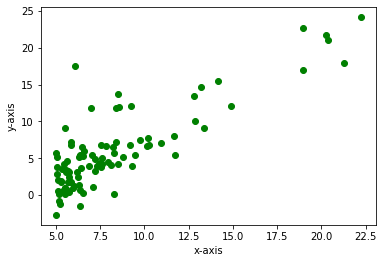

In [72]:
# 1. Plot the data
plt.plot(x,y,'go')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

In [94]:
# 2. Normal Equation
X_train = np.hstack((np.ones(x.shape),x))
XTX_I = np.linalg.inv(np.dot(X_train.T, X_train))
XTY = np.dot(X_train.T,y)
W = np.dot(XTX_I,XTY)
print("Coefficients are : W =",W[0], W[1])

Coefficients are : W = [-3.89578088] [1.19303364]


In [95]:
x1 = np.linspace(min(x),max(x),100)
y1 = W[1]*x1 + W[0]

Text(0, 0.5, 'y-axis')

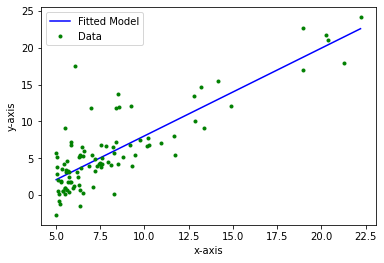

In [96]:
plt.plot(x1,y1,'b-',x,y,'g.')
plt.legend(["Fitted Model","Data"])
plt.xlabel('x-axis')
plt.ylabel('y-axis')

In [97]:
# 3. Gradient Descent

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [99]:
# a. Batch Gradient Descent
def grad_desc(X, Y, theta, l_rate, iteration):
    c_hist = np.zeros(iteration)
    t_hist = np.zeros((iteration, 2))
    for i in range(iteration):
        pred = np.dot(X, theta)
        theta = theta - (1/len(X)) * l_rate * (X.T.dot((pred - Y)))
        t_hist[i,:] = theta.T
        c_hist[i] = (np.sum((np.dot(X, theta) - Y)**2))/(2*len(X))
    return theta, c_hist, t_hist

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [204]:
l_rate = 0.001
iteration = 1000

In [205]:
theta1 = np.random.randn(2,1)
X1 = np.c_[np.ones((len(X_train), 1)), X_train]
theta1, tr_hist_cost, tr_hist_theta = grad_desc(X1, Y_train, theta1, l_rate, iteration)

print("For Training Data")
print("Value of Learning Rate :", l_rate)
print("Number of Iterations:", iteration)
print("Value of Theta_0 :", theta1[0][0], "\nValue of Theta_1 : ", theta1[1][0])   
print("Final value of Cost Function :",tr_hist_cost[-1])

For Training Data
Value of Learning Rate : 0.001
Number of Iterations: 1000
Value of Theta_0 : -0.00423695075559675 
Value of Theta_1 :  0.7659824249139036
Final value of Cost Function : 5.246181928750537


Text(0.5, 1.0, 'Fitted Model vs Training Data for Gradient Descent')

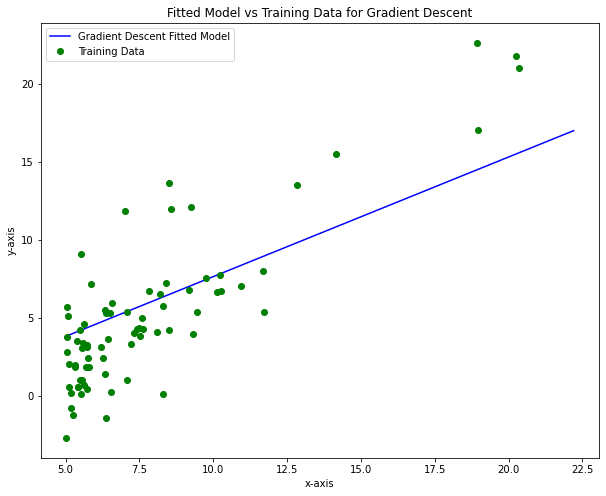

In [206]:
x1 = np.linspace(min(x),max(x),100)
y1 = x1*theta1[1][0] + theta1[0][0]
plt.figure(figsize=(10,8))
plt.plot(x1,y1,'b-',X_train,Y_train,'go')
plt.legend(["Gradient Descent Fitted Model","Training Data"])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Fitted Model vs Training Data for Gradient Descent")

In [207]:
theta2 = np.random.randn(2,1)
X2 = np.c_[np.ones((len(X_test), 1)), X_test]
theta2, test_hist_cost, test_hist_theta = grad_desc(X2, Y_test, theta2, l_rate, iteration)

print("For Testing Data")
print("Value of Learning Rate :", l_rate)
print("Number of Iterations:", iteration)
print("Value of Theta_0 :", theta2[0][0], "\nValue of Theta_1 : ", theta2[1][0])    
print("Final value of Cost Function :",test_hist_cost[-1])

For Testing Data
Value of Learning Rate : 0.001
Number of Iterations: 1000
Value of Theta_0 : 0.08329607735107586 
Value of Theta_1 :  0.8799404750265669
Final value of Cost Function : 7.630421267353318


Text(0.5, 1.0, 'Fitted Model vs Testing Data for Gradient Descent')

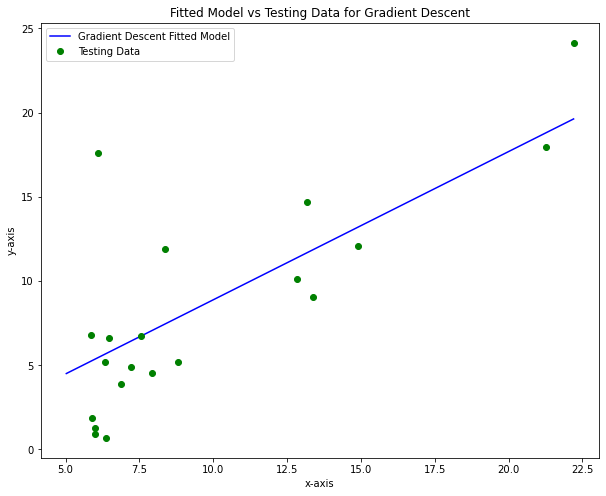

In [208]:
x1 = np.linspace(min(x),max(x),100)
y1 = x1*theta2[1][0] + theta2[0][0]
plt.figure(figsize=(10,8))
plt.plot(x1,y1,'b-',X_test,Y_test,'go')
plt.legend(["Gradient Descent Fitted Model","Testing Data"])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Fitted Model vs Testing Data for Gradient Descent")

Text(0.5, 1.0, 'MSE vs Iterations for Gradient Descent')

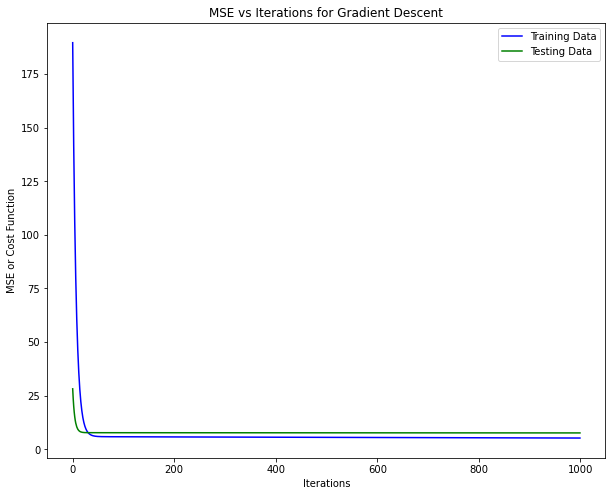

In [209]:
plt.figure(figsize=(10,8))
plt.plot(range(iteration),tr_hist_cost,'b-',label="Training Data")
plt.plot(range(iteration),test_hist_cost,'g-',label="Testing Data")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE or Cost Function")
plt.title("MSE vs Iterations for Gradient Descent")

Text(0.5, 1.0, 'MSE vs Iterations for Gradient Descent')

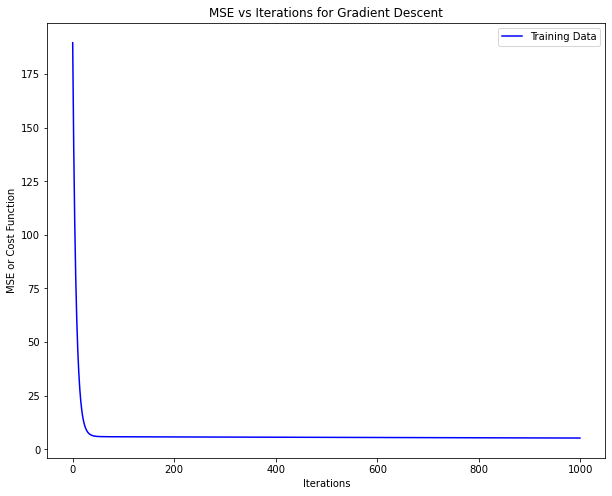

In [210]:
plt.figure(figsize=(10,8))
plt.plot(range(iteration),tr_hist_cost,'b-',label="Training Data")
# plt.plot(range(iteration),test_hist_cost,'g-',label="Testing Data")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE or Cost Function")
plt.title("MSE vs Iterations for Gradient Descent")

Text(0.5, 1.0, 'MSE vs Iterations for Gradient Descent')

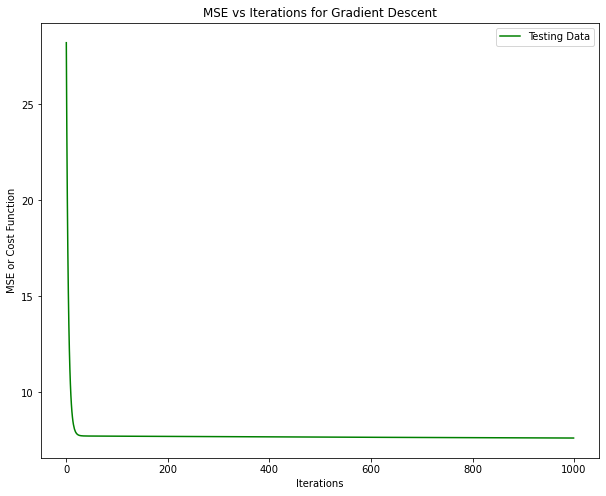

In [211]:
# plt.plot(range(iteration),tr_hist_cost,'b-',label="Training Data")
plt.figure(figsize=(10,8))
plt.plot(range(iteration),test_hist_cost,'g-',label="Testing Data")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE or Cost Function")
plt.title("MSE vs Iterations for Gradient Descent")

In [155]:
# c. Plot MSE of the testing set vs. learning rate
l_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

In [156]:
cost_fun_val = 10000000
for i in range(len(l_rate)):
    theta2, test_hist_cost, test_hist_theta = grad_desc(X2, Y_test, theta2, l_rate[i], iteration)
    if abs(test_hist_cost[-1]) < cost_fun_val:
        cost_fun_val = test_hist_cost[-1]
        lr = i
    print("\nLearning Rate : ",l_rate[i])
    print("Value of Theta_0 : ", theta2[0][0], "\nValue of Theta_1 : ", theta2[1][0])    
    print("Final value of Cost Function or MSE: ",test_hist_cost[-1])
print("\nBest Value of Learning Rate is :",l_rate[lr]," for MSE Value of ",cost_fun_val)


Learning Rate :  0.001
Value of Theta_0 :  -1.2098487742587012 
Value of Theta_1 :  0.9864767520125929
Final value of Cost Function or MSE:  7.413963828757543

Learning Rate :  0.002
Value of Theta_0 :  -1.2680246817623595 
Value of Theta_1 :  0.9912695983731594
Final value of Cost Function or MSE:  7.412237254572591

Learning Rate :  0.003
Value of Theta_0 :  -1.3210785781041174 
Value of Theta_1 :  0.9956404657116615
Final value of Cost Function or MSE:  7.411264068695486

Learning Rate :  0.004
Value of Theta_0 :  -1.3563176768112462 
Value of Theta_1 :  0.9985436535300465
Final value of Cost Function or MSE:  7.4109347376456025

Learning Rate :  0.005
Value of Theta_0 :  -1.3742961204370712 
Value of Theta_1 :  1.0000248150932805
Final value of Cost Function or MSE:  7.410864220043541

Learning Rate :  0.006
Value of Theta_0 :  -1.381509794703915 
Value of Theta_1 :  1.0006191166510858
Final value of Cost Function or MSE:  7.410854444987926

Learning Rate :  0.007
Value of Theta_0

In [65]:
# b. Stochastic Gradient Descent
def stoc_grad_desc(X, Y, theta, l_rate, iteration):
    c_hist = np.zeros(iteration)
    for i in range(iteration):
        cost = 0
        for j in range(len(X)):
            r = np.random.randint(0,len(X))
            X1 = X[r,:].reshape(1, X.shape[1])
            Y1 = Y[r,:].reshape(1,1)
            pred = np.dot(X1, theta)
            theta = theta - (1/m) * l_rate * (X1.T.dot((pred - Y1)))
            cost += (np.sum((np.dot(X1, theta) - Y1)**2))/(2*len(X1))
        c_hist[i] = cost
    return theta, c_hist

In [66]:
l_rate = 0.0085
iteration = 1500

In [67]:
theta1 = np.random.randn(2,1)
X1 = np.c_[np.ones((len(X_train), 1)), X_train]
theta1, tr_hist_cost = stoc_grad_desc(X1, Y_train, theta1, l_rate, iteration)

print("For Training Data")
print("Value of Learning Rate :", l_rate)
print("Number of Iterations:", iteration)
print("Value of Theta_0 : ", theta1[0][0], "\nValue of Theta_1 : ", theta1[1][0])   
print("Final value of Cost Function : ",tr_hist_cost[-1])

NameError: name 'm' is not defined

In [ ]:
x1 = np.linspace(min(x),max(x),100)
y1 = x1*theta1[1][0] + theta1[0][0]
plt.plot(x1,y1,'b-',X_train,Y_train,'g.')
plt.legend(["Stochastic Gradient Descent Fitted Model","Training Data"])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Fitted Model vs Training Data for Stochastic Gradient Descent")

In [ ]:
theta2 = np.random.randn(2,1)
X1 = np.c_[np.ones((len(X_test), 1)), X_test]
theta2, test_hist_cost = stoc_grad_desc(X1, Y_test, theta2, l_rate, iteration)

print("For Testing Data")
print("Value of Learning Rate :", l_rate)
print("Number of Iterations:", iteration)
print("Value of Theta_0 : ", theta2[0][0], "\nValue of Theta_1 : ", theta2[1][0])   
print("Final value of Cost Function : ",test_hist_cost[-1])

In [ ]:
x1 =np.linspace(min(x),max(x),100)
y1 =x1*theta2[1][0] + theta2[0][0]
plt.plot(x1,y1,'b-',X_test,Y_test,'g.')
plt.legend(["Stochastic Gradient Descent Fitted Model","Testing Data"])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Fitted Model vs Testing Data for Stochastic Gradient Descent")

ValueError: x and y must have same first dimension, but have shapes (1500,) and (1000,)

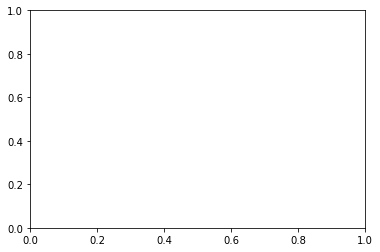

In [24]:
plt.plot(range(iteration),tr_hist_cost,'b-',label="Training Data")
plt.plot(range(iteration),test_hist_cost,'g-',label="Testing Data")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE or Cost Function")
plt.title("MSE vs Iterations for Stochastic Gradient Descent")

In [ ]:
# c. Plot MSE of the testing set vs. learning rate
l_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

In [ ]:
cost_fun_val = 10000000
for i in range(len(l_rate)):
    theta2, test_hist_cost = stoc_grad_desc(X2, Y_test, theta2, l_rate[i], iteration)
    if abs(test_hist_cost[-1]) < cost_fun_val:
        cost_fun_val = test_hist_cost[-1]
        lr = i
    print("\nLearning Rate : ",l_rate[i])
    print("Value of Theta_0 : ", theta2[0][0], "\nValue of Theta_1 : ", theta2[1][0])    
    print("Final value of Cost Function or MSE: ",test_hist_cost[-1])
print("\nBest Value of Learning Rate is :",l_rate[lr]," for MSE Value of ",cost_fun_val)

Here, it is observed that:
1. The number of iterations in Stochastic Gradient Descent is higher than that in Batch Gradient Descent.
2. But, Stochastic Gradient Descent is seen to converge faster than Batch Gradient Descent as seen from their respective plots for MSE vs Iterations, for both training and testing data set. 

Thus Stochastic Gradient Descent converges faster than Batch Gradient Descent

3. Plot of MSE in Stochastic Gradient Descent appears noisy as the values of approximations fluctuate greatly as compared to that in Batch Gradient Descent.
4. Stochastic Gradient Descent has an easier computation and thereby faster computation as opposed to that in Batch Gradient Descent. 
5. Accuracy of both the modes are similar on testing set.